# Medical Insurance Cost Data

In [119]:
import pandas as pd
import numpy as np

In [120]:
data = pd.read_csv('insurance.csv')

In [121]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

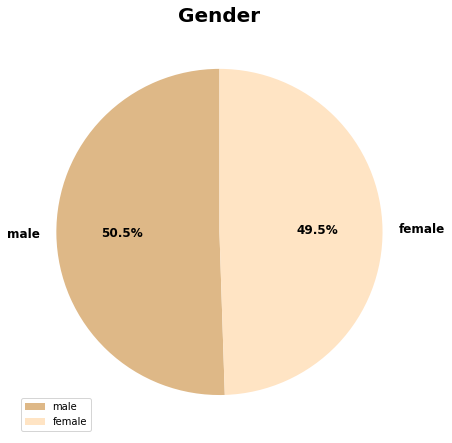

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7.5))
data['sex'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['burlywood','bisque'],textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('Gender',fontweight="bold",fontsize = 20)

plt.show()

Text(0.5, 1.0, 'Smoker')

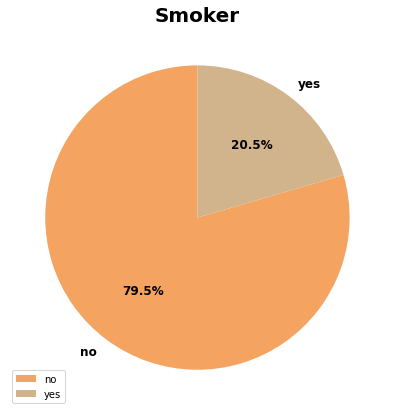

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1);
data['smoker'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['sandybrown','tan'],textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('Smoker',fontweight="bold",fontsize = 20)

Text(0.5, 1.0, 'Region')

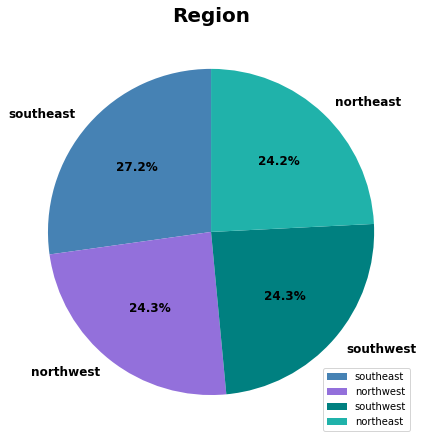

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
data['region'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=['steelblue','mediumpurple','teal', 'lightseagreen'],textprops={'fontweight':'bold','fontsize': 12});
plt.legend(loc=4,fontsize=10)
plt.ylabel('')
plt.title('Region',fontweight="bold",fontsize = 20)

Insight:

- The percentage of males and females who took medical insurance was almost the same.

- Almost all medical insurance customers came from non-smokers. 

- The percentage of beneficiaries from southeast, southwest, northwest, and northeast were almost the same.

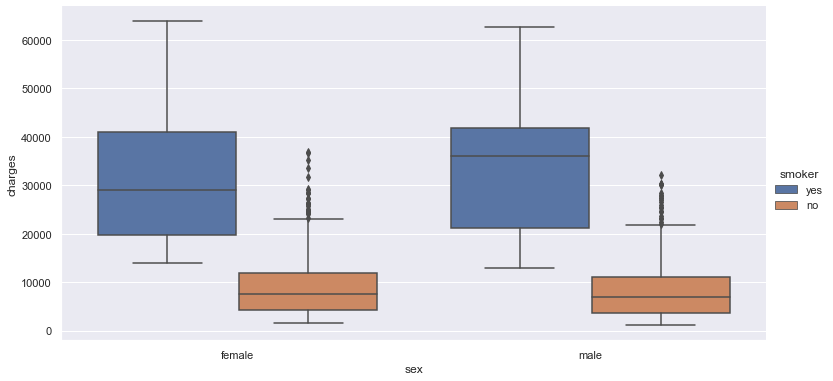

In [41]:
sns.catplot(x="sex", y="charges",
                hue="smoker",
                data=data, kind="box",
                height=5.27, aspect=10.7/5.27);

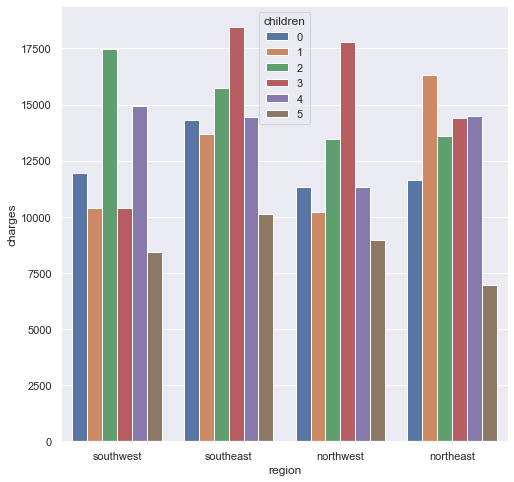

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

sns.barplot(x="region", y="charges", hue="children", data=data, ci=None);

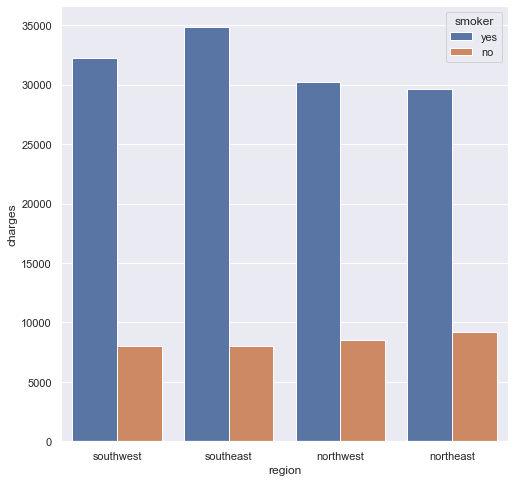

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

sns.barplot(x="region", y="charges", hue="smoker", data=data, ci=None);

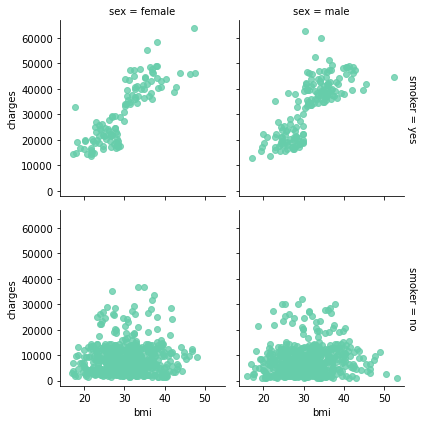

In [7]:
g = sns.FacetGrid(data, row="smoker", col="sex", margin_titles=True)
g.map(sns.regplot, "bmi", "charges", color="mediumaquamarine", fit_reg=False, x_jitter=.1)

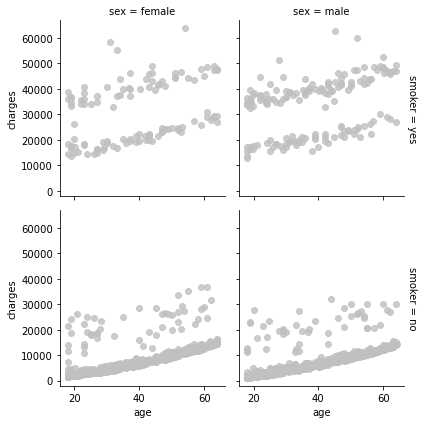

In [15]:
g = sns.FacetGrid(data, row="smoker", col="sex", margin_titles=True)
g.map(sns.regplot, "age", "charges", color="silver", fit_reg=False, x_jitter=.1)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
bins = np.linspace(min(data["bmi"]), max(data["bmi"]), 5)
bins

array([15.96  , 25.2525, 34.545 , 43.8375, 53.13  ])

In [8]:
group = ['Underweight','Normal','Overweight','Obese']
data['bmi-binned'] = pd.cut(data['bmi'], bins, labels=group, include_lowest=True )
data[['bmi','bmi-binned']].head(5)

,bmi,bmi-binned
0,27.900,Normal
1,33.770,Normal
2,33.000,Normal
3,22.705,Underweight
4,28.880,Normal


Text(0.5, 1.0, 'BMI Bins')

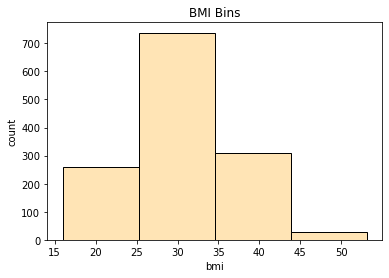

In [9]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)


plt.pyplot.hist(data["bmi"], bins = 4,color='moccasin',edgecolor='black')

plt.pyplot.xlabel("bmi")
plt.pyplot.ylabel("count")
plt.pyplot.title("BMI Bins")

In [10]:
print((data["bmi-binned"].value_counts())/len(data["bmi-binned"])*100)

Normal         55.156951
Overweight     23.243647
Underweight    19.431988
Obese           2.167414
Name: bmi-binned, dtype: float64


Insight:

- 55.16% of the beneficiaries had normal BMI and only 2.17% had fall within obese range. 

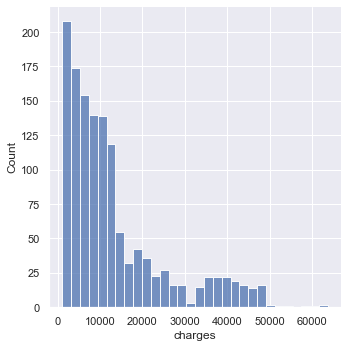

In [52]:
df = data['charges']

sns.displot(df)

plt.show()

- Distribution of the medical charges were skewed to left.  The charges fell toward the lower side of the scale and there were very few higher charges.

- Then, we performed log-transformation to charges variable.

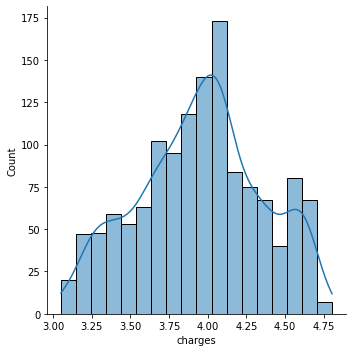

In [16]:
df = np.log10(data['charges'])

sns.displot(df,kde = True)

plt.show()

<AxesSubplot:>

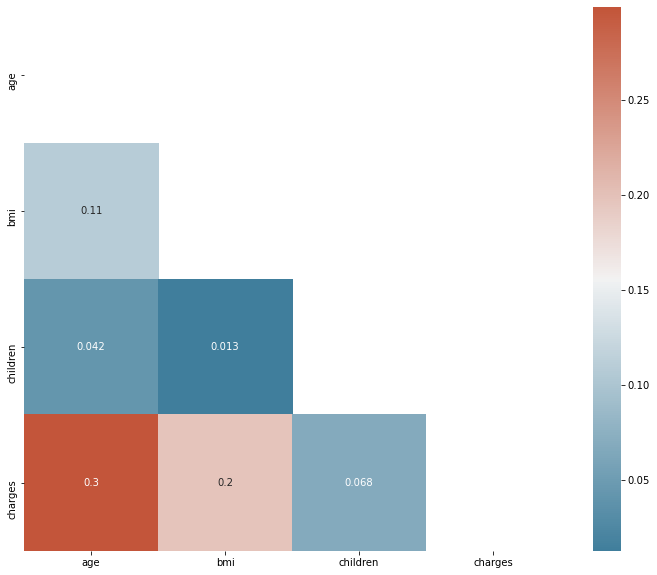

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Linear Regression 

In [122]:
data['children'] = data['children'].astype(str)

In [123]:
data.select_dtypes(include=['object']).columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [124]:
def model_matrix(data , columns):
    dummified_cols = pd.get_dummies(data[columns])
    data = data.drop(columns, axis = 1, inplace=False)
    data_new = data.join(dummified_cols)
    return data_new

data = model_matrix(data, ['sex', 'children', 'smoker', 'region'])

In [125]:
data.head(3)

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,16884.9240,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.77,1725.5523,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.00,4449.4620,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [126]:
data.select_dtypes(include=['int','float']).columns

Index(['bmi', 'charges'], dtype='object')

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
Scaler = StandardScaler()
data[['age','bmi', 'charges']] = Scaler.fit_transform(data[['age','bmi', 'charges']])

In [129]:
data.head(3)

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0.298584,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.953689,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,-0.797954,0.383307,-0.728675,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [130]:
import numpy as np
from sklearn import linear_model

In [131]:
X = data.drop('charges', axis=1)
y = data['charges']

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [63]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [64]:
regression.fit (x_train, y_train)

LinearRegression()

In [65]:
y_prediction =  regression.predict(x_test)

In [66]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression.coef_[idx]))

The coefficient for age is 0.29282047140843787
The coefficient for bmi is 0.16188395831318766
The coefficient for sex_female is 0.011812890940234537
The coefficient for sex_male is -0.011812890940234699
The coefficient for children_0 is -0.06568748222092949
The coefficient for children_1 is -0.09686440508806653
The coefficient for children_2 is 0.05284357490910761
The coefficient for children_3 is -0.02307789298967905
The coefficient for children_4 is 0.11707537927846627
The coefficient for children_5 is 0.01571082611110123
The coefficient for smoker_no is -0.9917725463056011
The coefficient for smoker_yes is 0.9917725463056004
The coefficient for region_northeast is 0.04291029259584259
The coefficient for region_northwest is 0.01753137512628032
The coefficient for region_southeast is -0.03296281941249626
The coefficient for region_southwest is -0.027478848309626495


In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R squared score: " , r2_score(y_prediction , y_test) )
print("Mean squared error (MSE) : " , mean_squared_error(y_test,y_prediction))
print("Root mean squared error (RMSE): " , np.sqrt(mean_squared_error(y_test,y_prediction)))

R squared score:  0.6496611914532804
Mean squared error (MSE) :  0.25335813291783815
Root mean squared error (RMSE):  0.5033469309709141


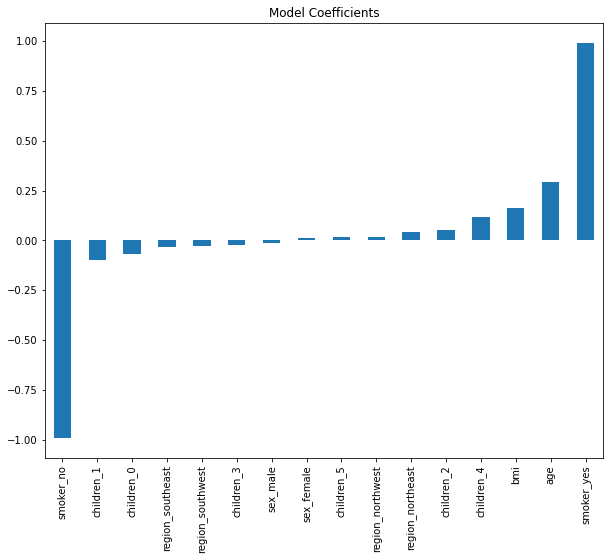

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series, DataFrame
predictors = x_train.columns
 
coef = Series(regression.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

## Ridge Regression

In [133]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV

In [85]:
parameters = {'alpha':[1, 10000]}

In [86]:
model = Ridge()

In [87]:
Ridge_reg = GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

In [88]:
Ridge_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 10000]},
             scoring='neg_mean_squared_error')

In [89]:
print(Ridge_reg.best_estimator_)

Ridge(alpha=1)


- α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.

- An alpha of 1, would result in a model that acts identical to Linear Regression.

- Then, we tried to use alpha = 0.7

In [134]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha = 0.7)
Ridge.fit(x_train,y_train)

Ridge(alpha=0.7)

In [135]:
y_prediction =  Ridge.predict(x_test)

In [136]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R squared score: " , r2_score(y_prediction , y_test) )
print("Mean squared error (MSE) : " , mean_squared_error(y_test,y_prediction))
print("Root mean squared error (RMSE): " , np.sqrt(mean_squared_error(y_test,y_prediction)))

R squared score:  0.6482708600881282
Mean squared error (MSE) :  0.25332132906483074
Root mean squared error (RMSE):  0.5033103705119046


## Feature selection using Random Forest Regressor

In [134]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [188]:
df = data

In [199]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [200]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [201]:
feature_names = X.columns

Text(0.5, 0, 'Random Forest Feature Importance')

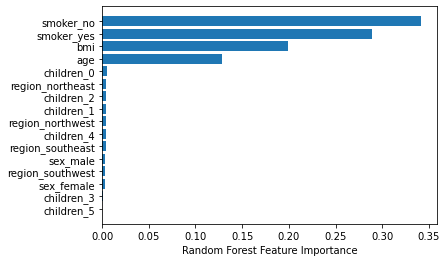

In [202]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Polynomial Regression

In [137]:
X = data[['smoker_no','smoker_yes','bmi','age','children_0']]
y = data[['charges']]

Degree = 2

In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [115]:
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.3, random_state = 0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

LinearRegression()

In [116]:
y_predict = Pol_reg.predict(x_test)

In [117]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R squared score: " , r2_score(y_predict, y_test) )
print("Mean squared error (MSE) : " , mean_squared_error(y_test,y_predict))
print("Root mean squared error (RMSE): " , np.sqrt(mean_squared_error(y_test,y_predict)))

R squared score:  0.8559520456247791
Mean squared error (MSE) :  0.13728797257694678
Root mean squared error (RMSE):  0.37052391633597254


Degree = 3

In [141]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
pol = PolynomialFeatures (degree = 3)
x_pol = pol.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.3, random_state = 0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

LinearRegression()

In [120]:
y1_predict = Pol_reg.predict(x_test)

In [121]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R squared score: " , r2_score(y1_predict, y_test) )
print("Mean squared error (MSE) : " , mean_squared_error(y_test,y1_predict))
print("Root mean squared error (RMSE): " , np.sqrt(mean_squared_error(y_test,y1_predict)))

R squared score:  0.8292164810582233
Mean squared error (MSE) :  0.17283247409806135
Root mean squared error (RMSE):  0.4157312522508518


Degree = 4

In [143]:
pol = PolynomialFeatures (degree = 4)
x_pol = pol.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.3, random_state = 0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

LinearRegression()

In [144]:
y2_predict = Pol_reg.predict(x_test)

In [145]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R squared score: " , r2_score(y2_predict, y_test) )
print("Mean squared error (MSE) : " , mean_squared_error(y_test,y2_predict))
print("Root mean squared error (RMSE): " , np.sqrt(mean_squared_error(y_test,y2_predict)))

R squared score:  0.8641466272209819
Mean squared error (MSE) :  0.13708950227978367
Root mean squared error (RMSE):  0.3702559956027501


## Accuracy of the models

1) Linear Regression

- R squared score:  0.6496611914532804

- Mean squared error (MSE) :  0.25335813291783815

2) Ridge Regression (alpha = 0.7)

- R squared score:  0.6482708600881282

- Mean squared error (MSE) :  0.25332132906483074

3) Polynomial Regression

Degree = 2

- R squared score:  0.8559520456247791

- Mean squared error (MSE) :  0.13728797257694678

Degree = 3

- R squared score:  0.8292164810582233

- Mean squared error (MSE) :  0.17283247409806135

Degree = 4

- R squared score:  0.8641466272209819

- Mean squared error (MSE) :  0.13708950227978367

If we compared all regression models, we chose polynomial regression degree = 4 as the best model to predict medical insurance cost.

The feature 'smoker' was the most affecting the insurance cost. Thus, the smokers likely had to pay more on the medical insurance cost. This prediction task was suitable for me as a beginner of medical insurance to calculate the insurance cost.  